# Cutoff Accuracy

In this notebook, I ran the random forest many times with different entropy cutoffs for "stable" and "unstable" nodes. At the end, I plotted the mean accuracy for each cutoff point. The plot at the bottom shows the results; it appears that the cutoff entropy chosen has little to no effect on the accuracy of the random forest.

In [3]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
%matplotlib inline

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [4]:
runs = 100

In [5]:
def assign_data(X, y):
    feature_list = list(X.columns)
    data = np.array(X)
    labels = np.squeeze(np.array(y))
    return feature_list, data, labels

In [6]:
def train(feature_list, data, labels):
    accuracy_scores = []

    skf = StratifiedKFold(n_splits=5)
    rf = RandomForestClassifier()

    for run in range(1, runs+1):

        for i in range(5):
            folds = next(skf.split(data, labels), None)

            X_train_fold = data[folds[0], :]
            X_val_fold = data[folds[1], :]
            y_train_fold = labels[folds[0]]
            y_val_fold = labels[folds[1]]

            model = rf.fit(X_train_fold, y_train_fold)
            predictions = rf.predict(X_val_fold)

            accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

    return accuracy_scores

In [7]:
cutoff_values = [0.015, 0.016, 0.017, 0.0175, 0.018, 0.0185, 0.019, 0.0195, 0.020, 0.021, 0.022]

In [8]:
mean_accuracies = []

In [10]:
for cut in tqdm(cutoff_values):
    X = pd.read_csv('../Louvain_Data/node_x_train.csv', index_col=0)
    y = pd.read_csv('../Louvain_Data/node_y_train.csv', index_col=0)
    feature_list, data, labels = assign_data(X, y)
    accuracy_scores = train(feature_list, data, labels)
    y_acc = np.mean(accuracy_scores)
    mean_accuracies.append(y_acc)

100%|██████████| 11/11 [31:54<00:00, 174.02s/it]


Text(0, 0.5, 'Mean accuracy')

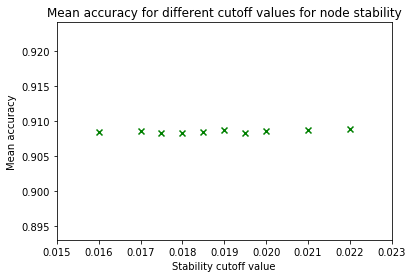

In [11]:
plt.scatter(cutoff_values[1:], mean_accuracies[1:], marker='x', c='green')
plt.title('Mean accuracy for different cutoff values for node stability')
plt.xlim(0.015, 0.023)
plt.xlabel('Stability cutoff value')
plt.ylabel('Mean accuracy')